# The Sparks Foundation

# Author: Sameer Batra

## Data Science and Business Analytics - GRIP May'23

### Prediction using Supervised ML

In this section we will predict the percentage of a student based on the number of study hours. This task involves 2 variables and is a simple Linear Regression task. We have to predict the score if a student studies for 9.25 hr/day.

## Importing tools

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Mean average of study hours is 5 hrs, minimum study is 1 hr whereas maximum study hours are 9 hrs.
Mean average of score is 51%, minimum score is 17% whereas maximum score is 95%

In [4]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualizing the data.

Text(0, 0.5, 'Percentage Score')

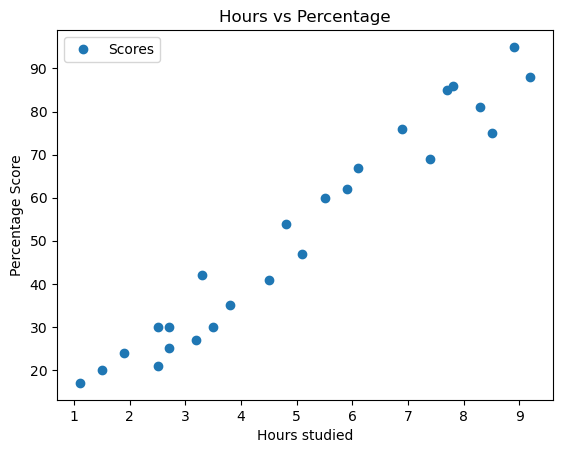

In [6]:
df.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")

## Data Preparation

In [7]:
X = df.drop("Scores", axis=1)
y = df["Scores"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training completed.")

Training completed.


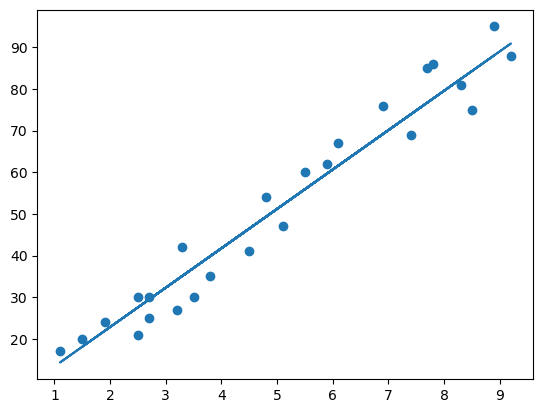

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

## Making Predictions

In [11]:
y_pred = regressor.predict(X_test) # Predicting the scores
y_pred

array([55.9258017 , 29.44610911, 37.01173556, 88.07971413, 49.30587855])

In [12]:
# Comparison of Actual vs Predicted values
preds_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preds_df

,Actual,Predicted
7,60,55.925802
9,25,29.446109
4,30,37.011736
15,95,88.079714
21,54,49.305879


In [13]:
# Testing with the given data and constraints.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.38967570457615


D:\Miniconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Evaluating The model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error is", mean_absolute_error(y_test, y_pred))
print("Mean Sqaured Error is", mean_squared_error(y_test, y_pred))
print("R2 Score is", r2_score(y_test, y_pred))

Mean Absolute Error is 5.4292900580431445
Mean Sqaured Error is 31.09130925850933
R2 Score is 0.9502825424419385
